In [1]:
#Stock Prediction :
#Importing basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the training dataset
training_set = pd.read_csv("/content/drive/MyDrive/Time Series/Google_Stock_Price_Train.csv")
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set["Date"].min() , training_set["Date"].max()

('1/10/2012', '9/9/2016')

In [5]:
training_set["Date"] = pd.to_datetime(training_set["Date"])
training_set.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object

In [6]:
#To check the number of rows and column
training_set.shape

(1258, 6)

In [7]:
#to take the input : Open
X = training_set.iloc[:,1:2]
# X = training_set.loc[:]["Open"]

In [8]:
X.shape

(1258, 1)

In [9]:
X.ndim  # 2D array

2

In [10]:
#Apply Scaling :
#1. MinMaxScaler(Normalised) : {(X-X.min()) / (X.max()-X.min())} range between 0-1
#2. StandardScaler(Standardisation)

#Apply feature engineering means Apply MinMaxScaler for every stock Market dataset
from sklearn.preprocessing import MinMaxScaler

In [11]:
#Create an object for MinMaxScaler
mms = MinMaxScaler()

In [12]:
X = mms.fit_transform(X)   #After scaling , change in numpy array
X

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
type(X)

numpy.ndarray

In [14]:
#To find the number of record
len(X)

1258

In [15]:
#Now select input and output from X input
X_train = X[0:1257]  #Start=0 Stop=1257-1=1256
Y_train = X[1:1258]  #Start=1 Stop=1258-1=1257

In [16]:
#To check the length of input and output
len(X_train) , len(Y_train)

(1257, 1257)

In [17]:
#Next step : Give data to machine in 3D data
X_train.ndim , Y_train.ndim

(2, 2)

In [18]:
#First dimension : No. of records/rows
#Second dimension : No. of columns
#Thrid dimension : time stamp

# 2023 --> 2022
#12-04-2023 --> 11-04-2023
# t+1 --> t --> t-1
#Time Stamp : t+1-t = 1 after 1 day from current
#Time Stamp : t+4-t = 4 after 4 day from current

In [19]:
#We convert input X_train from 2D to 3D
X_train = np.reshape(X_train,(1257,1,1))    # (No.of rows , No. of columns , TimeStamp)
X_train.ndim

3

In [20]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [21]:
# Neural Network : RNN (Recurrent Neural network) => LSTM (Long Short Term Memory)
# Time Series L Sequential
# t+1 => t => t-1 => t-2
# framework -> tensorflow -> keras -> models class -> sequential
'''
   tensorflow
       ↑
     keras
       ↑
   models : Outer Class
       ↑
   Sequential : Inner Class
   
   '''

'\n   tensorflow\n       ↑\n     keras\n       ↑\n   models : Outer Class\n       ↑\n   Sequential : Inner Class\n   \n   '

In [22]:
#Part 2 : Building the Neural Network(LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# LSTM means Long Short Term Memory : To manage internal memory
# Its store previous output

In [23]:
# We have regression problem means to predict stock's price and stock price is a contieous numeric value
# means it is regression problem means we take activation function on output layer : linear(Y_Pred = W*X+bias)

In [24]:
#To create the object of Sequential class
model = Sequential()

In [25]:
#To add the layers in model
model.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
# None means to take automatic number of rows from given dataset 
# 1 means number of columns
# Uints inbuilt parameters means passing the value of number of neurons

#To add output layer
model.add(Dense(units=1,activation='linear'))

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
# adam : momemtum + direction
# adam means adagrade + momentum 
#            direction + momentum
#optimizer=sgd : stochastic gradient descent (slow process)

In [27]:
#train the model with the training data , use fit() inbuilt method of sequential class
trained_model = model.fit(X_train,Y_train,epochs=75,batch_size=20)

Epoch 1/75
63/63 [==============================] - 5s 12ms/step - loss: 0.1772
Epoch 2/75
63/63 [==============================] - 1s 9ms/step - loss: 0.1142
Epoch 3/75
63/63 [==============================] - 0s 7ms/step - loss: 0.0886
Epoch 4/75
63/63 [==============================] - 1s 8ms/step - loss: 0.0798
Epoch 5/75
63/63 [==============================] - 0s 7ms/step - loss: 0.0769
Epoch 6/75
63/63 [==============================] - 0s 6ms/step - loss: 0.0750
Epoch 7/75
63/63 [==============================] - 0s 7ms/step - loss: 0.0733
Epoch 8/75
63/63 [==============================] - 0s 5ms/step - loss: 0.0715
Epoch 9/75
63/63 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 10/75
63/63 [==============================] - 0s 7ms/step - loss: 0.0677
Epoch 11/75
63/63 [==============================] - 0s 5ms/step - loss: 0.0656
Epoch 12/75
63/63 [==============================] - 0s 5ms/step - loss: 0.0634
Epoch 13/75
63/63 [=============================

In [28]:
# Part 3 : Test the model : use predict() inbuilt method
# given testing dataset  Google_Stock_Price_Test.csv
# to load Google_Stock_Price_Test.csv file
df_test = pd.read_csv('/content/drive/MyDrive/Time Series/Google_Stock_Price_Test.csv')

In [29]:
# To show first 5 records
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [30]:
# To check the datatypes
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [31]:
# To change the datatypes of Date column from object to date
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [32]:
# To number of data
df_test.shape

(20, 6)

In [33]:
X_test = df_test.iloc[:,1:2]
X_test.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [34]:
# Apply Normalised (MinMaxScaler) on X_test
# Create object of MinMaxScaler class
# mms = MinMaxScaler()
X_test = mms.transform(X_test)  # It will change into numpy array
X_test

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [35]:
X_test.ndim , type(X_test)

(2, numpy.ndarray)

In [36]:
len(X_test)

20

In [37]:
# Converts testing data input from 2D to 3D
X_test = np.reshape(X_test,(20,1,1))

In [38]:
X_test.ndim

3

In [39]:
X_test

array([[[0.92955205]],

       [[0.94731751]],

       [[0.94307612]],

       [[0.96015329]],

       [[0.98087655]],

       [[0.98359253]],

       [[0.97827219]],

       [[0.98225314]],

       [[0.98288563]],

       [[0.98214153]],

       [[0.979779  ]],

       [[0.97849542]],

       [[0.98182528]],

       [[0.98245777]],

       [[1.01045465]],

       [[1.02407173]],

       [[1.03930724]],

       [[1.03354044]],

       [[0.99624228]],

       [[0.9631297 ]]])

In [40]:
#Predict with testing data
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 222ms/step


In [41]:
Y_pred

array([[0.91754633],
       [0.93234116],
       [0.928829  ],
       [0.9428949 ],
       [0.9596904 ],
       [0.9618693 ],
       [0.95759624],
       [0.96079546],
       [0.9613026 ],
       [0.96070606],
       [0.9588085 ],
       [0.9577759 ],
       [0.96045214],
       [0.9609596 ],
       [0.9831378 ],
       [0.9937237 ],
       [1.0054108 ],
       [1.0010067 ],
       [0.9719487 ],
       [0.9453257 ]], dtype=float32)

In [42]:
# To remove scaling on Y_pred , use inverse_transform() inbuilt method which are defined in MinMaxScaler class
Y_pred = mms.inverse_transform(Y_pred)
Y_pred

array([[772.3562 ],
       [780.3093 ],
       [778.4213 ],
       [785.9826 ],
       [795.01117],
       [796.1825 ],
       [793.88544],
       [795.6052 ],
       [795.8778 ],
       [795.5571 ],
       [794.5371 ],
       [793.982  ],
       [795.42065],
       [795.6935 ],
       [807.61554],
       [813.3061 ],
       [819.5886 ],
       [817.2211 ],
       [801.60077],
       [787.28925]], dtype=float32)

In [43]:
X1 = df_test.iloc[:,1:2]   #Input
#Select output from Input X1
Y_test = X1[1:20]     #Start=1 , Stop=20-1=19

In [44]:
Y_test.shape , Y_pred.shape

((19, 1), (20, 1))

In [45]:
Y_pred = Y_pred[0:19]     #start=0 , stop=20-1=19
Y_pred.shape

(19, 1)

In [46]:
#Evaluation of model
#find the mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,Y_pred))

223.64618753107098


In [47]:
#Find the r2_score
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

-0.22148359934492068


In [48]:
#Predict the next day price : 
price = float(input("Enter Todays Price : "))
#Here price is a scaler variable 
#print(type(price))

#First , convert scaler variable price into 2D numpy array
#use inbuilt method array() of numpy array
price = np.array([[price]])    #[[]] 2D array (input always 2D array)
#print(price.ndim)

#Apply MinMaxScaler on input price
price1 = mms.transform(price)
#print(price1)

#Convert input price1 from 2D to 3D array
price1 = price1.reshape(-1,1,1)      #-1 or None means automatic accept number of inputs
# 1 means number of column  and 1 means time stamp means h=just next day
#print(price1.ndim)

#Prediction
y_pred = model.predict(price1)
#print(y_pred)
#remove scaling from y_pred , use inbuilt method inverse_transform() of MinMaxScaler
y_pred = mms.inverse_transform(y_pred)
print("Opening Price of Next Day : ",y_pred)

Enter Todays Price : 567
1/1 [==============================] - 0s 22ms/step
Opening Price of Next Day :  [[570.64343]]


In [53]:
#Predict the Stock Price of next 5 days : 
price = float(input("Enter Todays Price : "))
#Here price is a scaler variable 
#print(type(price))

#First , convert scaler variable price into 2D numpy array
#use inbuilt method array() of numpy array
price = np.array([[price]])    #[[]] 2D array (input always 2D array)
#print(price.ndim)
n = int(input("How many next days : "))
for i in range(n):
  #Apply MinMaxScaler on input price
  price1 = mms.transform(price)
  #Convert input price1 from 2D to 3D array
  price1 = price1.reshape(-1,1,1)      #-1 or None means automatic accept number of inputs
  # 1 means number of column  and 1 means time stamp means h=just next day
    
  #Prediction
  y_pred = model.predict(price1)
  y_pred = mms.inverse_transform(y_pred)
  print("Opening price of Next Day : ",y_pred)
  price = y_pred

#t --> t+1 --> t+2 --> t+3

Enter Todays Price : 100
How many next days : 5
1/1 [==============================] - 0s 30ms/step
Opening price of Next Day :  [[141.61343]]
1/1 [==============================] - 0s 23ms/step
Opening price of Next Day :  [[170.66255]]
1/1 [==============================] - 0s 22ms/step
Opening price of Next Day :  [[192.22658]]
1/1 [==============================] - 0s 24ms/step
Opening price of Next Day :  [[208.92345]]
1/1 [==============================] - 0s 23ms/step
Opening price of Next Day :  [[222.2545]]


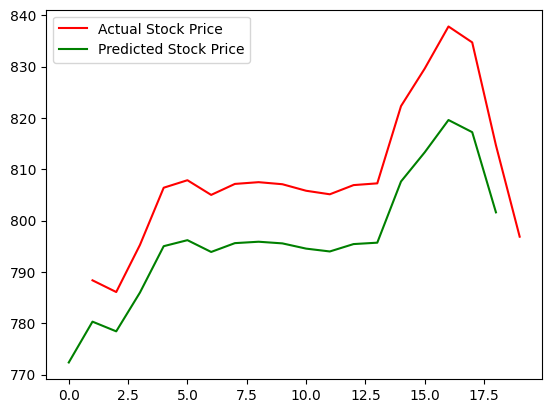

In [55]:
#Visualisation :
plt.plot(Y_test,color='red',label="Actual Stock Price")
plt.plot(Y_pred,color="green",label="Predicted Stock Price")
plt.legend()
plt.show()
